# Predictive-Analysis-of-delhivery-Logistics_

Using the dataset, the firm wants to find opportunities to improve efficiency in operations and understand how the estimated delivery time/distance varies with respect to the actual delivery time/distance.

       
###  Features of the dataset:

- Column Profiling:

| Feature | Description |
|:--------|:------------|
|data| tells whether the data is testing or training data|
|trip_creation_time| Timestamp of trip creation|
|route_schedule_uuid| Unique ID for a particular route schedule|
|**route_type**| **Transportation type**|
|a. FTL–Full Truck Load| FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way|
|b. Carting | Handling system consisting of small vehicles (carts)|
|trip_uuid| Unique ID given to a particular trip (A trip may include different source and destination centers)|
|source_center| Source ID of trip origin |
|source_name| Source Name of trip origin |
|destination_center| Destination ID |
|destination_name| Destination Name |
|od_start_time| Trip start time |
|od_end_time| Trip end time |
|start_scan_to_end_scan | Time taken to deliver from source to destination |
|is_cutoff | Unknown field |
|cutoff_factor | Unknown field|
|cutoff_timestamp | Unknown field|
|actual_distance_to_destination | Distance in kms between source and destination warehouse|
|actual_time | Actual time taken to complete the delivery (Cumulative) |
|osrm_time | An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative) |
|osrm_distance | An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative) |
|factor | Unknown field |
| segment_actual_time | This is a segment time. Time taken by the subset of the package delivery|
|segment_osrm_time | This is the OSRM segment time. Time taken by the subset of the package delivery|
| segment_osrm_distance | This is the OSRM distance. Distance covered by subset of the package delivery|
| segment_factor | Unknown field |

**Load  the Dataset**

In [241]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [242]:
delhivery_Logistics=pd.read_csv('/content/delhivery.csv')

**view some data from the dataset**

In [243]:
#view frist row from the dataset
delhivery_Logistics.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,time_to_start,time_taken,hour,day,month,osrm_distance_time_ratio,distance_time_ratio
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.0,11.9653,1.272727,45.932363,86.213637,2,Thursday,September,1.087755,-3.564340
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,9.0,9.7590,1.111111,45.932363,86.213637,2,Thursday,September,1.086215,-5.063158
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,7.0,10.8152,2.285714,45.932363,86.213637,2,Thursday,September,1.162125,-12.362721
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,12.0,13.0224,1.750000,45.932363,86.213637,2,Thursday,September,1.139050,-25.881972
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,5.0,3.9153,1.200000,45.932363,86.213637,2,Thursday,September,1.232230,-28.613960


In [244]:
#view last row from the dataset
delhivery_Logistics.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,time_to_start,time_taken,hour,day,month,osrm_distance_time_ratio,distance_time_ratio
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,12.0,8.1858,1.000000,0.0,427.686364,16,Thursday,September,1.132133,-48.741722
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,21.0,17.3725,1.238095,0.0,427.686364,16,Thursday,September,1.127407,-65.907469
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,34.0,20.7053,0.588235,0.0,427.686364,16,Thursday,September,1.103333,-73.836409
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,27.0,18.8885,0.629630,0.0,427.686364,16,Thursday,September,1.135417,-84.319333
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,9.0,8.8088,11.500000,0.0,427.686364,16,Thursday,September,0.934020,-355.960990


In [245]:
#view  data from the dataset
delhivery_Logistics.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'time_to_start', 'time_taken', 'hour', 'day', 'month',
       'osrm_distance_time_ratio', 'distance_time_ratio'],
      dtype='object')

**Data inspection**

In [246]:
#view  how many row & col from the dataset
delhivery_Logistics.shape

(144867, 31)

Data have 24 columns and 144867 rows

In [247]:
#to know the null data on the dataset
delhivery_Logistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144867 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144867 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

The data types : bool ,float64, int64, object

the data have null values in :source_name & destination_name



> **Statics**



In [248]:
delhivery_Logistics.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,958.892543,1030.038332,46.000000,161.000000,449.000000,1634.000000,3554.000000
cutoff_factor,144867.0,231.718217,340.092319,9.000000,22.000000,66.000000,286.000000,1474.000000
actual_distance_to_destination,144867.0,232.925676,340.547241,9.102045,23.355874,66.126571,286.708875,1482.010986
actual_time,144867.0,414.362319,587.435676,14.000000,51.000000,132.000000,513.000000,2599.000000
osrm_time,144867.0,212.753678,303.541296,8.000000,27.000000,64.000000,257.000000,1355.000000
osrm_distance,144867.0,283.416128,415.725151,10.262077,29.914700,78.525800,343.193250,1849.902665
factor,144867.0,2.056920,0.887126,0.877551,1.604264,1.857143,2.213483,6.958356
segment_actual_time,144867.0,33.763183,25.224431,0.000000,20.000000,29.000000,40.000000,169.000000
segment_osrm_time,144867.0,18.235837,11.339801,0.000000,11.000000,17.000000,22.000000,72.000000
segment_osrm_distance,144867.0,22.460325,12.833991,0.000000,12.070100,23.513000,27.813250,77.394119


In [249]:
delhivery_Logistics.describe(include='object').T

,count,unique,top,freq
data,144867,2,training,104858
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144867,2,FTL,99660
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144867,1498,Gurgaon_Bilaspur_HB (Haryana),23640
destination_center,144867,1481,IND000000ACB,15192
destination_name,144867,1468,Gurgaon_Bilaspur_HB (Haryana),15453
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81


In [250]:
delhivery_Logistics.describe(include='bool').T

,count,unique,top,freq
is_cutoff,144867,2,True,118749




> **Duplicated**



In [251]:
delhivery_Logistics.duplicated().sum()

0



> **Missing values**



In [252]:
delhivery_Logistics.isna().any()

,0
data,False
trip_creation_time,False
route_schedule_uuid,False
route_type,False
trip_uuid,False
source_center,False
source_name,False
destination_center,False
destination_name,False
od_start_time,False


In [253]:
delhivery_Logistics.isnull().sum()/delhivery_Logistics.shape[0]*100

,0
data,0.000000
trip_creation_time,0.000000
route_schedule_uuid,0.000000
route_type,0.000000
trip_uuid,0.000000
source_center,0.000000
source_name,0.000000
destination_center,0.000000
destination_name,0.000000
od_start_time,0.000000


Only source_name and destination_name have missing values. Destination_name have 0.202254% missing value and Source_name have 0.180165% missing value.

 Replace missing value  freequency imputer

In [254]:
freq_imputer = SimpleImputer(strategy = 'most_frequent')
for i in ['source_name', 'destination_name']:
    delhivery_Logistics[i] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(delhivery_Logistics[i])))

In [255]:
delhivery_Logistics.isna().any()

,0
data,False
trip_creation_time,False
route_schedule_uuid,False
route_type,False
trip_uuid,False
source_center,False
source_name,False
destination_center,False
destination_name,False
od_start_time,False


In [256]:
# Dropping unknown fields

unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
delhivery_Logistics = delhivery_Logistics.drop(columns = unknown_fields)

**Duplicate Detection**

In [257]:
#to know if data  have unique var on the dataset
for i in delhivery_Logistics.columns:
    if delhivery_Logistics[i].dtypes=='object':
        print(i,delhivery_Logistics[i].unique())
        print(delhivery_Logistics[i].value_counts())
        print('----------------------------------------------------')

data ['training' 'test']
data
training    104858
test         40009
Name: count, dtype: int64
----------------------------------------------------
trip_creation_time ['2018-09-20 02:35:36.476840' '2018-09-23 06:42:06.021680'
 '2018-09-14 15:42:46.437249' ... '2018-09-22 11:30:41.399439'
 '2018-09-17 11:35:28.838714' '2018-09-20 16:24:28.436231']
trip_creation_time
2018-09-28 05:23:15.359220    101
2018-10-02 06:05:53.086094    101
2018-09-27 04:47:19.425867    101
2018-09-22 04:55:04.835022    101
2018-09-29 05:04:57.639067    101
                             ... 
2018-09-27 18:08:18.207639      1
2018-09-28 17:31:07.690205      1
2018-09-29 14:56:33.655170      1
2018-09-19 04:35:44.776558      1
2018-09-14 17:04:32.989471      1
Name: count, Length: 14817, dtype: int64
----------------------------------------------------
route_schedule_uuid ['thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef'
 'thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc211728881b'
 'thanos::sroute:a16bfa03-3462-4bce



> **Correct Data Types**




Convert object type To DateTime

In [258]:
delhivery_Logistics['trip_creation_time']=pd.to_datetime(delhivery_Logistics['trip_creation_time'])
delhivery_Logistics['od_start_time']=pd.to_datetime(delhivery_Logistics['od_start_time'])
delhivery_Logistics['od_end_time']=pd.to_datetime(delhivery_Logistics['od_end_time'])

delhivery_Logistics.dtypes

,0
data,object
trip_creation_time,datetime64[ns]
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,datetime64[ns]


In [259]:
delhivery_Logistics.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,time_to_start,time_taken,hour,day,month,osrm_distance_time_ratio,distance_time_ratio
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,45.932363,86.213637,2,Thursday,September,1.087755,-3.564340
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.0,9.0,9.7590,45.932363,86.213637,2,Thursday,September,1.086215,-5.063158
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,16.0,7.0,10.8152,45.932363,86.213637,2,Thursday,September,1.162125,-12.362721
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.0,12.0,13.0224,45.932363,86.213637,2,Thursday,September,1.139050,-25.881972
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,6.0,5.0,3.9153,45.932363,86.213637,2,Thursday,September,1.232230,-28.613960


Convert relevant columns  to `category` type

data and route_type as they only have 2 values

In [260]:
delhivery_Logistics['route_type'] = delhivery_Logistics['route_type'].astype('category')
delhivery_Logistics['data']=delhivery_Logistics['data'].astype('category')
delhivery_Logistics.dtypes

,0
data,category
trip_creation_time,datetime64[ns]
route_schedule_uuid,object
route_type,category
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,datetime64[ns]


In [261]:
delhivery_Logistics.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,time_to_start,time_taken,hour,day,month,osrm_distance_time_ratio,distance_time_ratio
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,45.932363,86.213637,2,Thursday,September,1.087755,-3.564340
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.0,9.0,9.7590,45.932363,86.213637,2,Thursday,September,1.086215,-5.063158
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,16.0,7.0,10.8152,45.932363,86.213637,2,Thursday,September,1.162125,-12.362721
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.0,12.0,13.0224,45.932363,86.213637,2,Thursday,September,1.139050,-25.881972
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,6.0,5.0,3.9153,45.932363,86.213637,2,Thursday,September,1.232230,-28.613960


**Outlier Detection and Handling**

In [262]:
numeric_columns=delhivery_Logistics.select_dtypes(include=['number']).columns
numeric_columns

Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'time_to_start',
       'time_taken', 'hour', 'osrm_distance_time_ratio',
       'distance_time_ratio'],
      dtype='object')

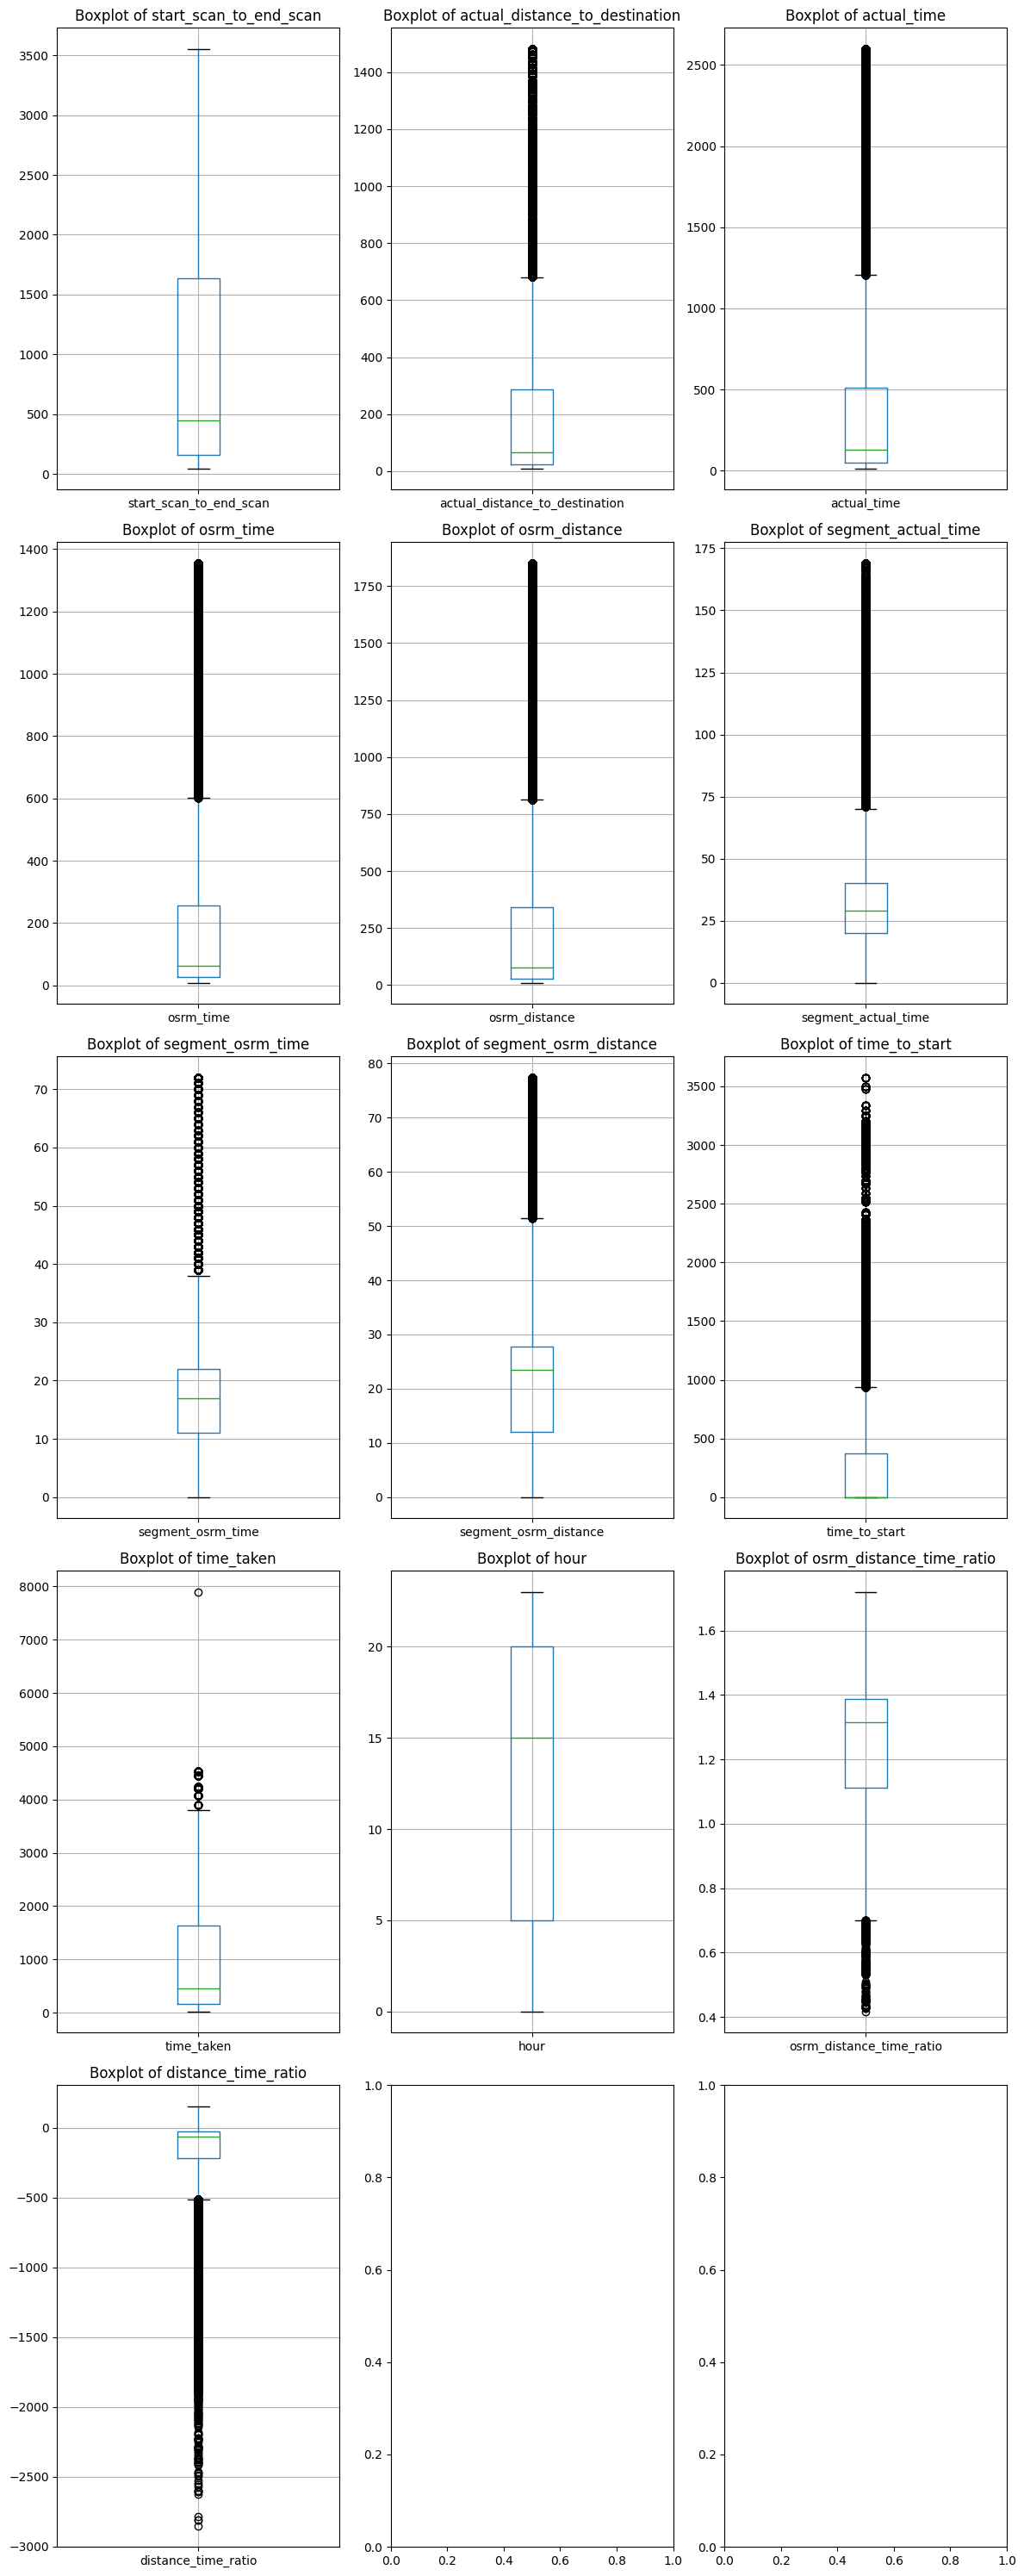

In [263]:
fig, axes = plt.subplots(5, 3, figsize=(12, 30))
axes = axes.flatten()
for i, c in enumerate(numeric_columns):
    delhivery_Logistics.boxplot(column=c, ax=axes[i])
    axes[i].set_title(f'Boxplot of {c}')


plt.tight_layout()
plt.show()

Detect any outliers in numerical data by IQR OR Z_score

In [264]:
z_scores = delhivery_Logistics[numeric_columns].apply(zscore)
outliers = (z_scores.abs() > 3).sum()

outliers

,0
start_scan_to_end_scan,0
actual_distance_to_destination,3576
actual_time,3779
osrm_time,3753
osrm_distance,3756
segment_actual_time,3142
segment_osrm_time,3070
segment_osrm_distance,2758
time_to_start,3450
time_taken,350


Handle these outliers

In [265]:
def Handle_outliers(df, columns, lower_threshold=0.01,threshold=0.99):
    for col in columns:
        lower_limit = df[col].quantile(lower_threshold)
        upper_limit = df[col].quantile(threshold)
        df[col] = df[col].clip(lower=lower_limit,upper=upper_limit)
    return df

# Apply capping to handle outliers
delhivery_Logistics = Handle_outliers(delhivery_Logistics, numeric_columns)

<Axes: >

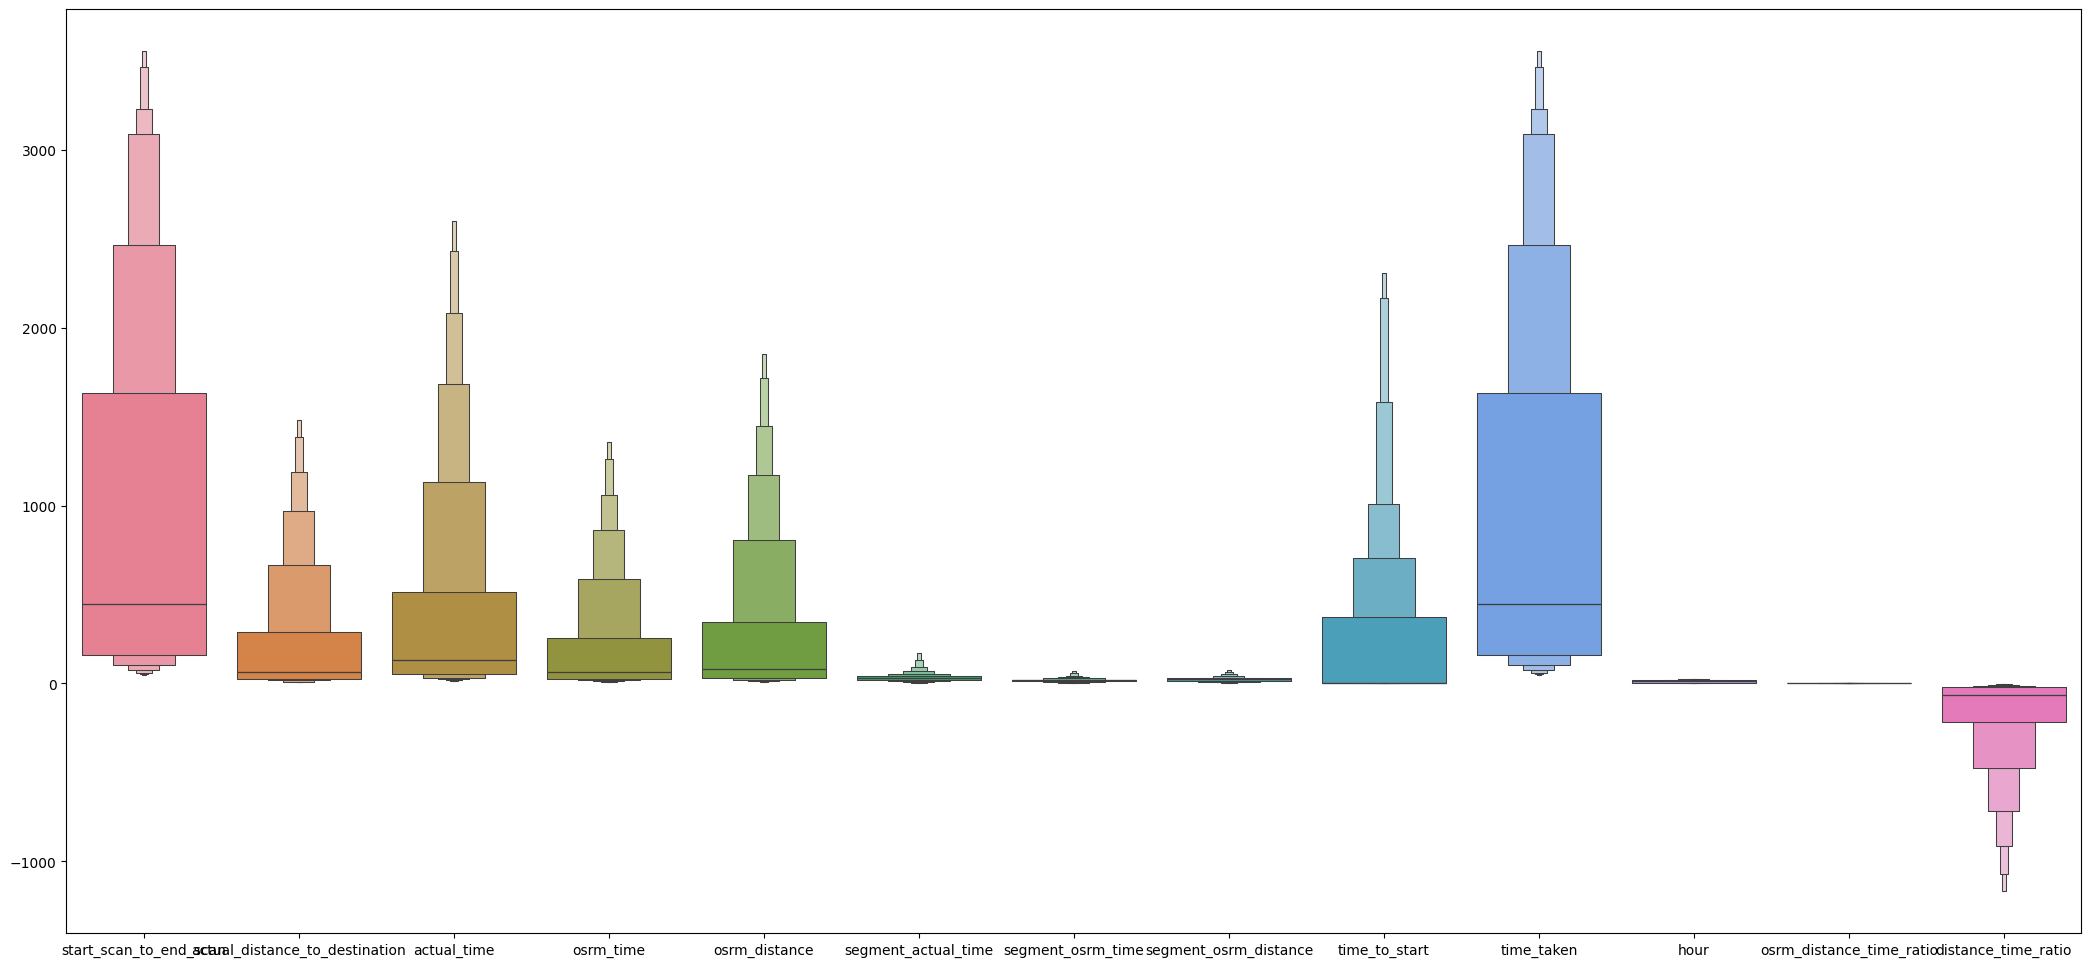

In [266]:
plt.figure(figsize=(26,12))
sns.boxenplot(data=delhivery_Logistics[numeric_columns])

 **Feature Engineering**



> **Trip Duration**



Create a new feature for the time taken for each trip by calculating the difference between start and end times

In [267]:
# Calculate time difference between trip creation and start
delhivery_Logistics['time_to_start'] = (delhivery_Logistics['od_start_time'] - delhivery_Logistics['trip_creation_time']).dt.total_seconds() / 60
delhivery_Logistics['time_taken'] = (delhivery_Logistics['od_end_time'] - delhivery_Logistics['od_start_time']).dt.total_seconds() / 3600
delhivery_Logistics.head(14)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,time_to_start,time_taken,hour,day,month,osrm_distance_time_ratio,distance_time_ratio
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,45.932363,1.436894,2,Thursday,September,1.087755,-3.564340
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.0,9.0,9.7590,45.932363,1.436894,2,Thursday,September,1.086215,-5.063158
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,16.0,7.0,10.8152,45.932363,1.436894,2,Thursday,September,1.162125,-12.362721
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.0,12.0,13.0224,45.932363,1.436894,2,Thursday,September,1.139050,-25.881972
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,6.0,5.0,3.9153,45.932363,1.436894,2,Thursday,September,1.232230,-28.613960
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,15.0,11.0,12.1171,132.145999,1.819553,2,Thursday,September,1.101555,-4.596962
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,28.0,6.0,9.1719,132.145999,1.819553,2,Thursday,September,1.252294,-25.954519
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,21.0,11.0,14.5362,132.145999,1.819553,2,Thursday,September,1.235352,-36.938104
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,10.0,10.0,11.3648,132.145999,1.819553,2,Thursday,September,1.210000,-37.060833
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,26.0,6.0,6.0434,132.145999,1.819553,2,Thursday,September,1.182964,-58.404198




> **Extract time-based features**



Extracted hour, day name, and month name from 'trip_creation_time'

In [268]:
delhivery_Logistics['hour']=delhivery_Logistics['trip_creation_time'].dt.hour
delhivery_Logistics['day']=delhivery_Logistics['trip_creation_time'].dt.day_name()
delhivery_Logistics['month']=delhivery_Logistics['trip_creation_time'].dt.month_name()

delhivery_Logistics.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,time_to_start,time_taken,hour,day,month,osrm_distance_time_ratio,distance_time_ratio
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,45.932363,1.436894,2,Thursday,September,1.087755,-3.564340
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.0,9.0,9.7590,45.932363,1.436894,2,Thursday,September,1.086215,-5.063158
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,16.0,7.0,10.8152,45.932363,1.436894,2,Thursday,September,1.162125,-12.362721
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.0,12.0,13.0224,45.932363,1.436894,2,Thursday,September,1.139050,-25.881972
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,6.0,5.0,3.9153,45.932363,1.436894,2,Thursday,September,1.232230,-28.613960




> **Distance Covered**



In [269]:
# Create ratio features
delhivery_Logistics['osrm_distance_time_ratio']=delhivery_Logistics['osrm_distance']/delhivery_Logistics['osrm_time']
delhivery_Logistics['distance_time_ratio']=delhivery_Logistics['actual_distance_to_destination']-delhivery_Logistics['actual_time']
delhivery_Logistics.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,time_to_start,time_taken,hour,day,month,osrm_distance_time_ratio,distance_time_ratio
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,45.932363,1.436894,2,Thursday,September,1.087755,-3.564340
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.0,9.0,9.7590,45.932363,1.436894,2,Thursday,September,1.086215,-5.063158
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,16.0,7.0,10.8152,45.932363,1.436894,2,Thursday,September,1.162125,-12.362721
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.0,12.0,13.0224,45.932363,1.436894,2,Thursday,September,1.139050,-25.881972
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,6.0,5.0,3.9153,45.932363,1.436894,2,Thursday,September,1.232230,-28.613960


**Sanitize and Normalize Data**

In [270]:
st_scaled=StandardScaler()
st_scaled.fit_transform(delhivery_Logistics[numeric_columns])

array([[-0.84743987, -0.6533331 , -0.68154475, ..., -1.34002585,
        -0.84721164,  0.6791809 ],
       [-0.84743987, -0.62836972, -0.66452155, ..., -1.34002585,
        -0.85562389,  0.67345787],
       [-0.84743987, -0.60282123, -0.63728443, ..., -1.34002585,
        -0.44084343,  0.6455855 ],
       ...,
       [-0.51638309, -0.48969024, -0.46705244, ...,  0.42109446,
        -0.76208953,  0.41085668],
       [-0.51638309, -0.46761665, -0.43641068, ...,  0.42109446,
        -0.58677694,  0.37082908],
       [-0.51638309, -0.47831023,  0.01981106, ...,  0.42109446,
        -1.68723383, -0.66639719]])

In [273]:

delhivery_Logistics = pd.DataFrame(delhivery_Logistics, columns=numeric_columns)
# Now you can use the head() method
delhivery_Logistics.head(15)

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,time_to_start,time_taken,hour,osrm_distance_time_ratio,distance_time_ratio
0,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,45.932363,1.436894,2,1.087755,-3.564340
1,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,45.932363,1.436894,2,1.086215,-5.063158
2,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,45.932363,1.436894,2,1.162125,-12.362721
3,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,45.932363,1.436894,2,1.139050,-25.881972
4,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,45.932363,1.436894,2,1.232230,-28.613960
5,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171,132.145999,1.819553,2,1.101555,-4.596962
6,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719,132.145999,1.819553,2,1.252294,-25.954519
7,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362,132.145999,1.819553,2,1.235352,-36.938104
8,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648,132.145999,1.819553,2,1.210000,-37.060833
9,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434,132.145999,1.819553,2,1.182964,-58.404198


**Save Cleaned Data**

In [272]:
import os
cleaned_file_path = '/content/delhivery/cleaned_logistics_data.csv'
os.makedirs(os.path.dirname(cleaned_file_path), exist_ok=True)

delhivery_Logistics.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")

Cleaned data saved to /content/delhivery/cleaned_logistics_data.csv
